## Import all necessary libraries

In [13]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

## Data Processing 
### Dataset Click [Here](https://www.kaggle.com/datasets/prathumarikeri/american-sign-language-09az) to download

In [14]:
data_path = 'C:/Users/admin/Desktop/Python Prog/Age gender detector/sign language/asl_alphabet_train'
image_size = (64, 64)
batch_size = 32

# Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

# Get the number of classes
num_classes = len(train_generator.class_indices)



Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Define Model

In [15]:
# CNN model for image classification
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (64, 64, 3)  

cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.summary()


c:\Users\admin\Desktop\Python Prog\venv-Model\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,941 (2.62 MB)

 Trainable params: 686,941 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model using the data generators
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


c:\Users\admin\Desktop\Python Prog\venv-Model\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 177s 80ms/step - accuracy: 0.4299 - loss: 1.9233 - val_accuracy: 0.6917 - val_loss: 1.0205
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 171s 78ms/step - accuracy: 0.9042 - loss: 0.2795 - val_accuracy: 0.7765 - val_loss: 0.8292
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 172s 79ms/step - accuracy: 0.9492 - loss: 0.1487 - val_accuracy: 0.7593 - val_loss: 1.1234
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 160s 74ms/step - accuracy: 0.9648 - loss: 0.1035 - val_accuracy: 0.8096 - val_loss: 0.9605
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 161s 74ms/step - accuracy: 0.9720 - loss: 0.0843 - val_accuracy: 0.8091 - val_loss: 0.9742
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 164s 75ms/step - accuracy: 0.9787 - loss: 0.0625 - val_accuracy: 0.7925 - val_loss: 1.0219
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 161s 74ms/step - accuracy: 0.9812 - loss: 0.0574 - val_accuracy: 0.7985 - val_loss: 1.1528
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 164s 76ms/step - accuracy: 0.9831 - lo

## Plotting loss and accuracy

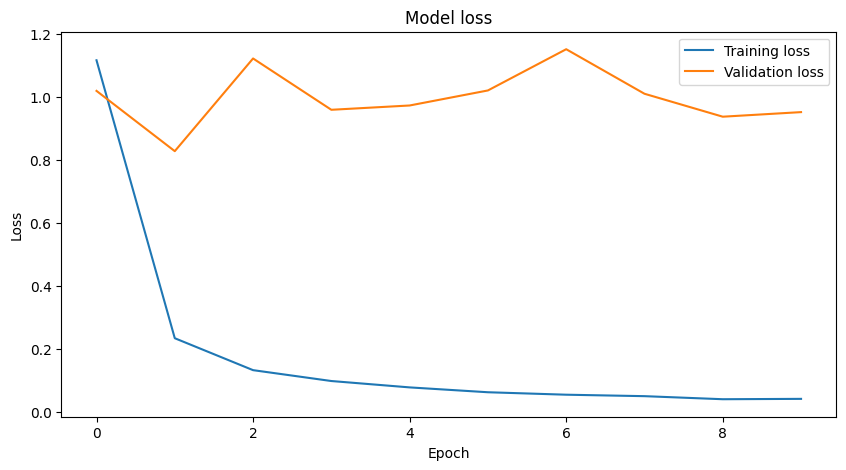

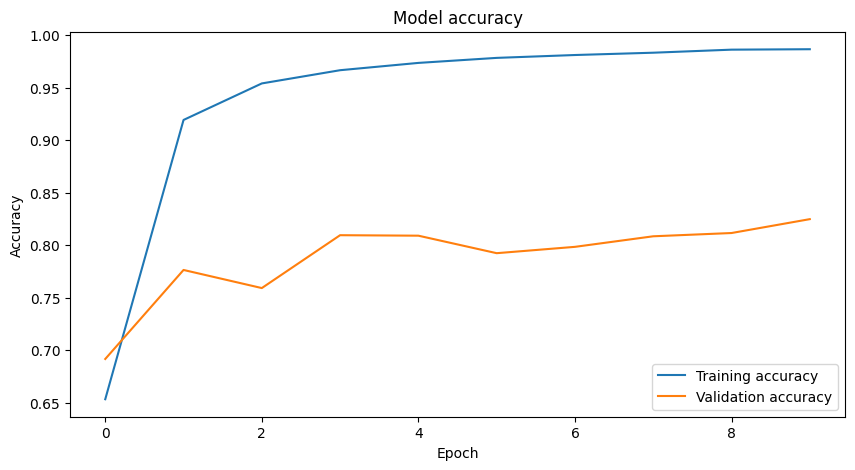

In [17]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Save the model in .keras format
model_path = 'C:/Users/admin/Desktop/Python Prog/Age gender detector/sign_language_model.keras'
#cnn_model.save(model_path)
#print(f'Model saved to {model_path}')


In [19]:
# Load the saved model
loaded_model = load_model(model_path)

## Predict Sign Label from Image Path using Pre-Trained Model and Testing

In [20]:
def predict_sign(image_path, model, label_map):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    image = cv2.resize(image, (64, 64))
    image = np.expand_dims(image, axis=0) / 255.0
    prediction = model.predict(image)
    label_idx = np.argmax(prediction)
    label = {v: k for k, v in label_map.items()}[label_idx]
    return label

# Example prediction using the loaded model
image_path = 'C:/Users/admin/Desktop/Python Prog/Age gender detector/sign language/asl_alphabet_test/D_test.jpg'
predicted_sign = predict_sign(image_path, loaded_model, train_generator.class_indices)
print(f'Predicted Sign: {predicted_sign}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Sign: D


## Creating report

In [21]:
# Generate predictions and true labels for the validation set
validation_generator.reset()
y_pred = []
y_true = []


# Iterate over the validation generator
for _ in range(len(validation_generator)):
    x_batch, y_batch = next(validation_generator)
    y_pred_batch = loaded_model.predict(x_batch)
    y_pred.extend(np.argmax(y_pred_batch, axis=1))
    y_true.extend(y_batch)

# Classification report
label_map = {v: k for k, v in train_generator.class_indices.items()}
y_true = [label_map[idx] for idx in y_true]
y_pred = [label_map[idx] for idx in y_pred]

report = classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys()))
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━